In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   float64
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [13]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#here we will be trainig  a logisitc regression model
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_test,y_pred_log))

0.8211497515968772
[[934 102]
 [150 223]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [15]:
#Tunning and analysing the Logistic Regression Model
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid.best_params_)

Best Parameters for Logistic Regression: {'C': 100}


Top 10 Important Features (Logistic Regression):
Contract_Two year                 1.393039
tenure                            1.338958
InternetService_Fiber optic       0.992466
Contract_One year                 0.636088
TotalCharges                      0.626486
PhoneService_Yes                  0.515758
OnlineSecurity_Yes                0.402374
StreamingMovies_Yes               0.367158
PaperlessBilling_Yes              0.332317
PaymentMethod_Electronic check    0.323456
dtype: float64


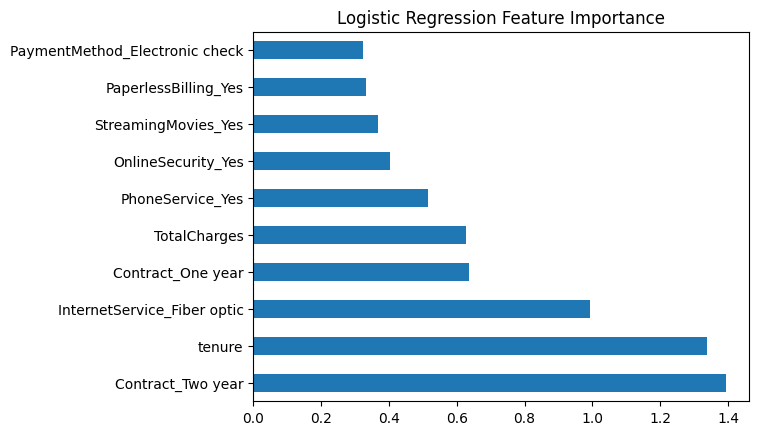

In [16]:
log_coeff = pd.Series(log_reg.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print("Top 10 Important Features (Logistic Regression):")
print(log_coeff.head(10))

log_coeff.head(10).plot(kind='barh', title="Logistic Regression Feature Importance")
plt.show()

In [17]:
#Logistic regression with best parameters
log_reg_best = LogisticRegression(C=100)
log_reg_best.fit(X_train,y_train)

y_pred_log_best = log_reg_best.predict(X_test)

print(accuracy_score(y_test,y_pred_log_best))
print(confusion_matrix(y_test,y_pred_log_best))
print(classification_report(y_test,y_pred_log_best))

0.8197303051809794
[[934 102]
 [152 221]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



        Model  Accuracy
0      LogReg   0.82115
1  LogRegBest   0.81973


<function matplotlib.pyplot.show(close=None, block=None)>

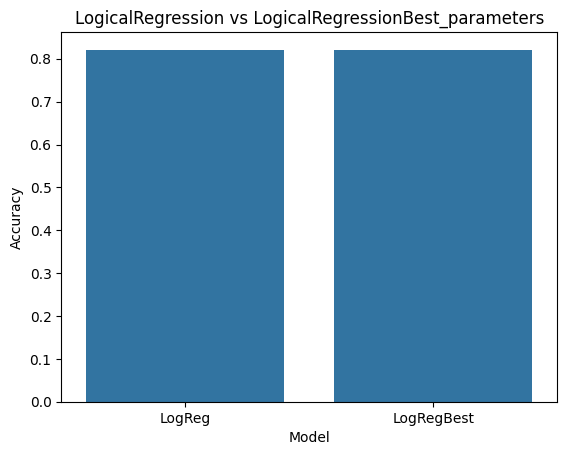

In [18]:
LogiclaRegressionModels = ['LogReg','LogRegBest']
LogRegParam = [
    accuracy_score(y_test,y_pred_log),
    accuracy_score(y_test,y_pred_log_best)
]

comparison = pd.DataFrame({'Model': LogiclaRegressionModels,'Accuracy' : LogRegParam})
print(comparison)
sns.barplot(x='Model',y='Accuracy',data=comparison)
plt.title('LogicalRegression vs LogicalRegressionBest_parameters')
plt.show

With hyperparameter tunning the accurace fell propably beacuse of overfitting